**KELOMPOK 8**

***Anggota***
1. Aditya Noeleka
2. Aprillia Ika
3. Arum Puspita Sari
4. Mario Marfelly
5. Septasia Dwi
6. Stella IndranawaskiAprillia Ika

## Stage-1 EDA

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ', np.__version__)
print('pandas version : ', pd.__version__)
print('seaborn version : ', sns.__version__)

numpy version :  1.20.3
pandas version :  1.3.4
seaborn version :  0.11.2


In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Descriptive Statistics

## Load Data

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# memanggil data

#df_train_raw = pd.read_csv('/content/drive/My Drive/Rakamin/final project/health insurance dataset/train.csv')
df_train_raw = pd.read_csv('train.csv') #anggi
df_train_raw.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## Describe Data

In [4]:
# mengecek tipe data dan missing value disetiap kolom
df_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


**Dataset ini merupakan data asuransi kendaraan**

Kolom-kolom pada dataset berikut adalah:
* `id` : ID unik
* `Gender` : Jenis kelamin
* `Age` : Umur
* `Driving_License` : Nasabah yang memiliki surat izin mengemudi
0 : tidak punya, 1 : punya
* `Region_Code` : Kode area nasabah
* `Previously_Insured` : Nasabah yang memiliki asuransi kendaraan
0 : tidak punya, 1 : punya
* `Vehicle_Age` : Umur kendaraan
* `Vehicle_Damage` : Nasabah yang pernah mendapatkan masalah kendaraan rusak
0 : tidak pernah, 1 : pernah
* `Annual_Premium` : biaya yang dibayarkan nasabah dalam 1 tahun
* `Policy_Sales_Channel` : Kode dimana nasabah membuka polis asuransi kendaraan, contoh: melalui agen lain, surat, telepon, secara langsung, dll
* `Vintage` : Jangka waktu nasabah berlangganan asuransi kendaraan (satuan Hari)
* `Response` : Tanggapan nasabah yang tertarik dengan asuransi kendaraan
0: tidak tertarik, 1 : tertarik

**Insight**
* Target ada di kolom `Response` dengan keterangan:
    * 1 = tertarik
    * 0 = tidak tertarik
* Kolom yang lain adalah *feature*
* Dataset memiliki total 381109 baris dan 12 kolom
* Semua kolom tidak memiliki *missing value*
* Beberapa kolom kurang sesuai tipe datanya:
    * `Region_Code` : float > str
    * `Annual_Premium` : float > int
    * `Policy_Sales_Channel` : float > int

In [5]:
# cek nilai summary
df_train_raw.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


**Insight**
* Kolom `Annual_Premium` terlihat memiliki outliers (nilai max jauh dari Q3)
* Semua kolom memiliki perbedaan nilai mean dan median yang tidak signifikan sehingga tidak ada indikasi outlier atau skewed distribution

## Jawaban No.1 Descriptive Statistics

* A. Beberapa kolom kurang sesuai tipe datanya:
    * `Region_Code` : float > str
    * `Annual_Premium` : float > int
    * `Policy_Sales_Channel` : float > int
* B. Semua kolom pada dataset tidak ada nilai yang kosong/missing value
* C. 
-_ Kolom `Annual_Premium` terlihat memiliki outliers (nilai max jauh dari Q3)
-_ Semua kolom memiliki perbedaan nilai mean dan median yang tidak signifikan sehingga tidak ada indikasi outlier atau skewed distribution

# Univariate Analysis

## Duplicated Values

In [6]:
# menyalin dataset agar tidak mengubah dataset raw
df_train = df_train_raw.copy()

# mengetahui jumlah baris yang duplicated terhadap semua kolom
print('Jumlah baris duplicate: ', df_train.duplicated().sum())

# mengetahui jumlah baris yang duplicated terhadap semua kolom kecuali ID
print('Jumlah baris yang duplicated kecuali ID: ', df_train.duplicated(subset = df_train.columns[1:]).sum())

Jumlah baris duplicate:  0
Jumlah baris yang duplicated kecuali ID:  269


In [7]:
# identifikasi kolom numerical
cols_numerical = ['Age','Region_Code','Driving_License','Previously_Insured','Annual_Premium','Policy_Sales_Channel','Vintage','Response']

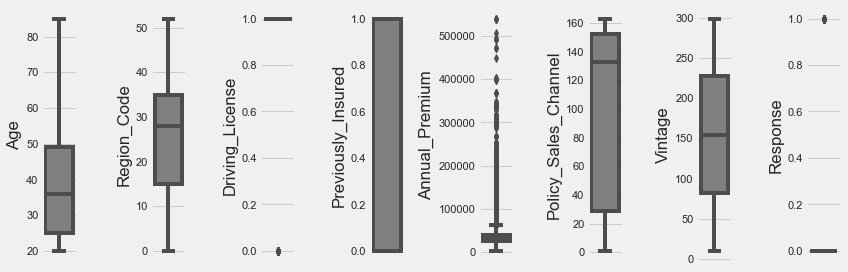

In [8]:
# boxplot untuk kolom numerikal
plt.figure(figsize=(12,4))
for i in range(0, len(cols_numerical)):
    plt.subplot(1, len(cols_numerical), i+1)
    sns.boxplot(y = df_train[cols_numerical[i]], color = 'grey', orient = 'v')
    plt.tight_layout()

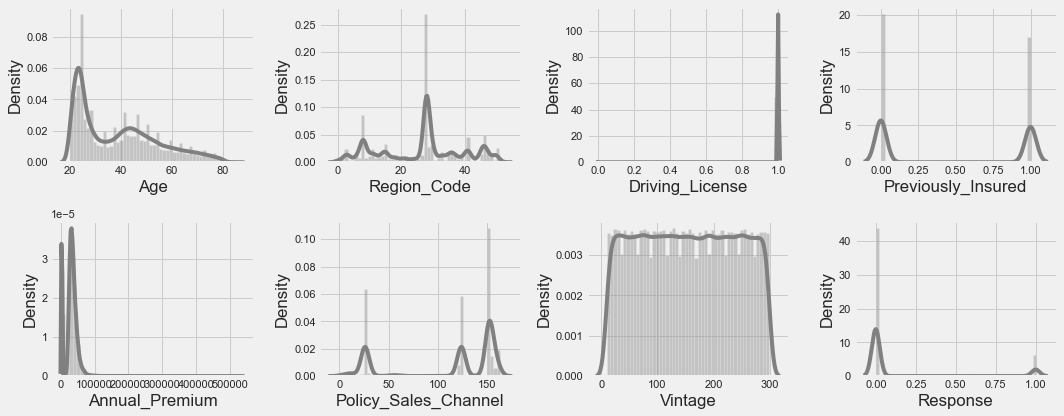

In [9]:
# histogram untuk kolom numerikal
plt.figure(figsize=(15,6))
for i in range(0, len(cols_numerical)):
    plt.subplot(2, 4, i+1)
    sns.distplot(df_train_raw[cols_numerical[i]], color = 'grey')
    plt.tight_layout()

**Insight**:
* Kolom `Annual_Premium` memiliki outliers
* Kolom `Age`, dan `Annual_Premium` memiliki distribusi yang skewed ke kanan (skewed positif)

In [12]:
# identifikasi kolom kategorikal
cols_categorical = ['Gender','Vehicle_Age','Vehicle_Damage']

In [11]:
df_train[cols_categorical].describe()

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


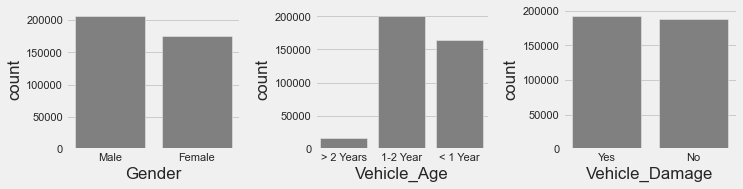

In [13]:
# countplot kolom kategorikal
plt.figure(figsize=(14,5))
for i in range(0, len(cols_categorical)):
    plt.subplot(2, 4, i+1)
    sns.countplot(df_train_raw[cols_categorical[i]], color = 'grey', orient = 'v')
    plt.tight_layout()

**Insight**:
* Semua kolom memiliki jumlah unique value yang jelas

## Duplicated Insight

* Jumlah baris duplicate (include ID) = 0
* Jumlah baris yang duplicated (exclude ID) = 269
* Kolom `Annual_Premium` memiliki outliers
* Kolom `Age`, dan `Annual_Premium` memiliki distribusi yang skewed ke kanan (skewed positif)
* Kolom `Vintage` memiliki distribusi normal
* Semua kolom kategorikal `Gender`, `Vehicle_Age`, dan `Vehicle_Damage` memiliki value yang jelas dan tidak banyak value yang variatif 

** Yang harus difollow-up saat data preprocessing adalah **
1. Pada kolom 'Annual_Premium' yang menunjukkan adanya outlier, penanganan adanya outlier tersebut sebaiknya adalah perlu hati-hati atau lebih konservatif terhadap kolom 'Annual_Premium' tersebut. Karena penanganan outlier yang baik adalah tidak terburu-buru untuk melakukan handling dengan menghapus data apabila boxplot menunjukkkan adanya outlier.
2. Pada kolom 'Age' dan 'Annual _Premium' yang distribusinya skewed ke kanan, penanganan yang dapat dilakukan yaitu dimungkinkan menggunakan logaritma transformasi.

# Multivariate Analysis

## Heatmap Correlation

<AxesSubplot:>

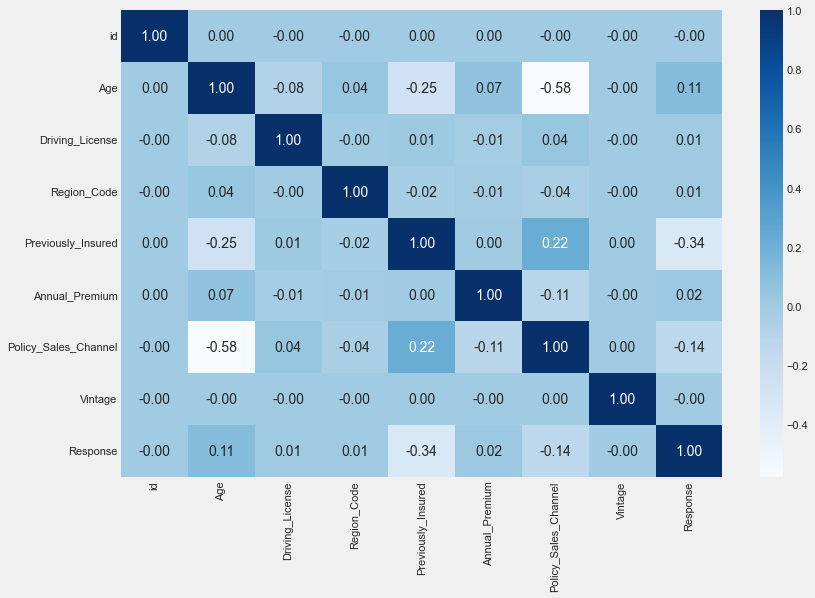

In [14]:
# membuat heatmap correlation dengan data raw
plt.figure(figsize = (12, 8))
sns.heatmap(df_train.corr(), cmap = 'Blues', annot = True, fmt = '.2f')

 **Insight**:
 * Target output yaitu `Response` sebagai variabel target / variabel dependent karena variabel `Response`adalah hasil prediksi dari variabel bebas lainnya dan hasilnya akan selalu berubah menyesuaikan variabel bebas
 * Tidak ada korelasi yang kuat antara target `Response` dengan masing-masing feature yang ada
 * Kemungkinan besar tidak ada data yang redundant (>0.7)

**Korelasi hasil heatmap**

 * Kolom `Policy_Sales_Channel` dengan `Age` memiliki korelasi kuat negatif
 * Kolom `Previously_Insured` dengan `Response` memiliki korelasi kuat negatif
 * Kolom `Age`, `Response`, dan `Annual_Premium` memiliki korelasi kuat positif
 * Kolom Previously_Insured dengan Age memiliki korelasi kuat negatif
 * Kolom `Policy_Sales_Channel` dengan `Previously_Insured` memiliki korelasi kuat positif

## Pair Plots

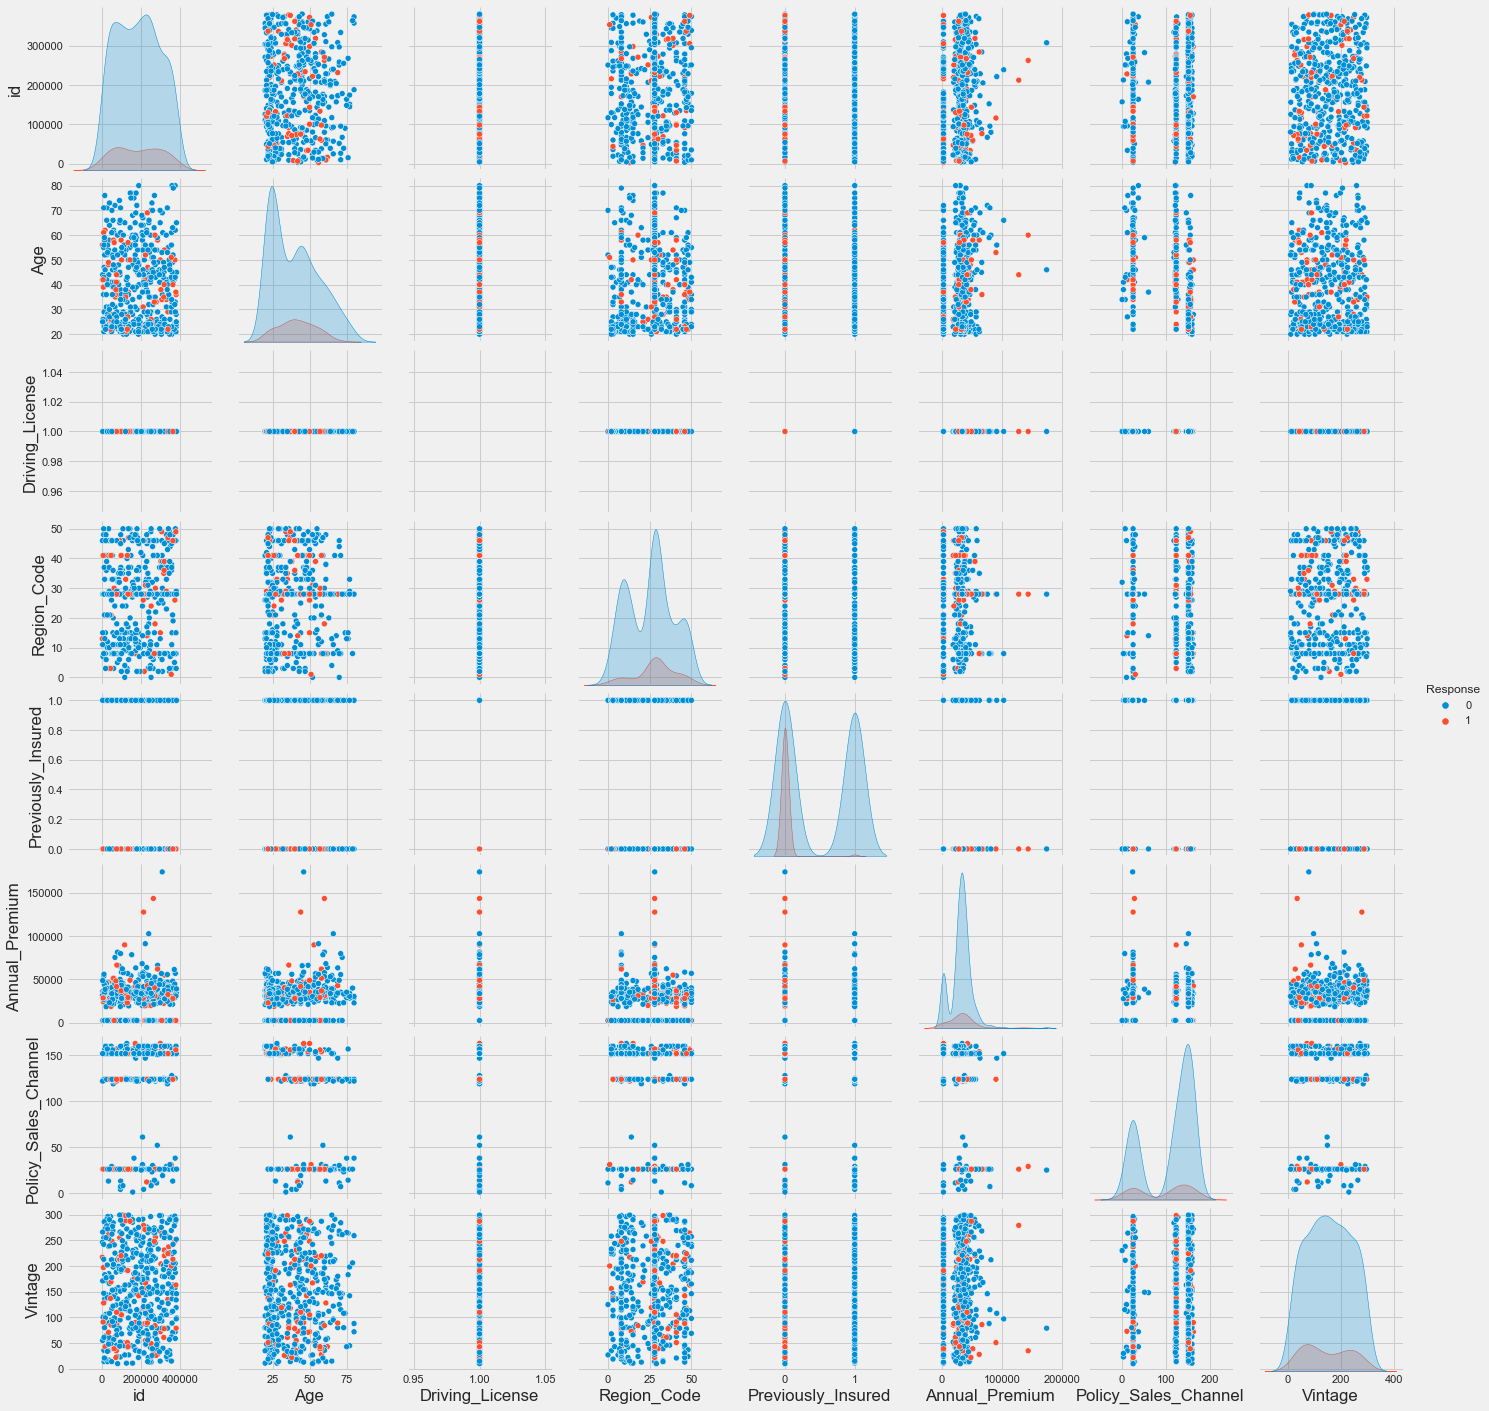

In [ ]:
# Membuat pairplot dengan sample data 500
sns.pairplot(df_train.sample(500), diag_kind='kde',hue = 'Response')

## Category Plots

<AxesSubplot:xlabel='Gender', ylabel='count'>

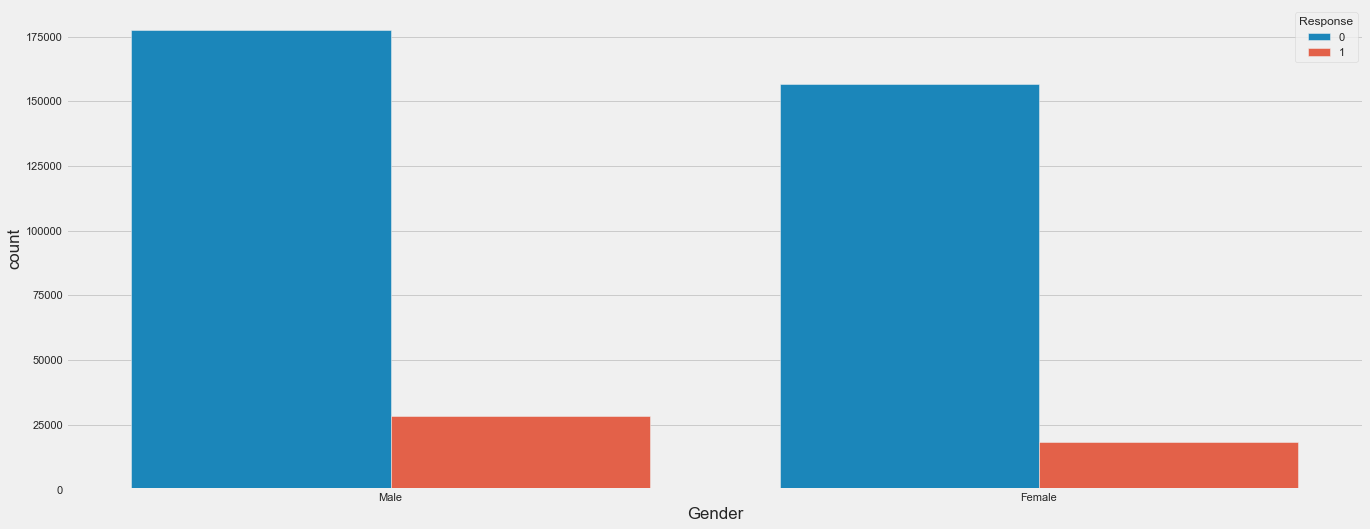

In [ ]:
sns.countplot(data=df_train,x='Gender',hue='Response')

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

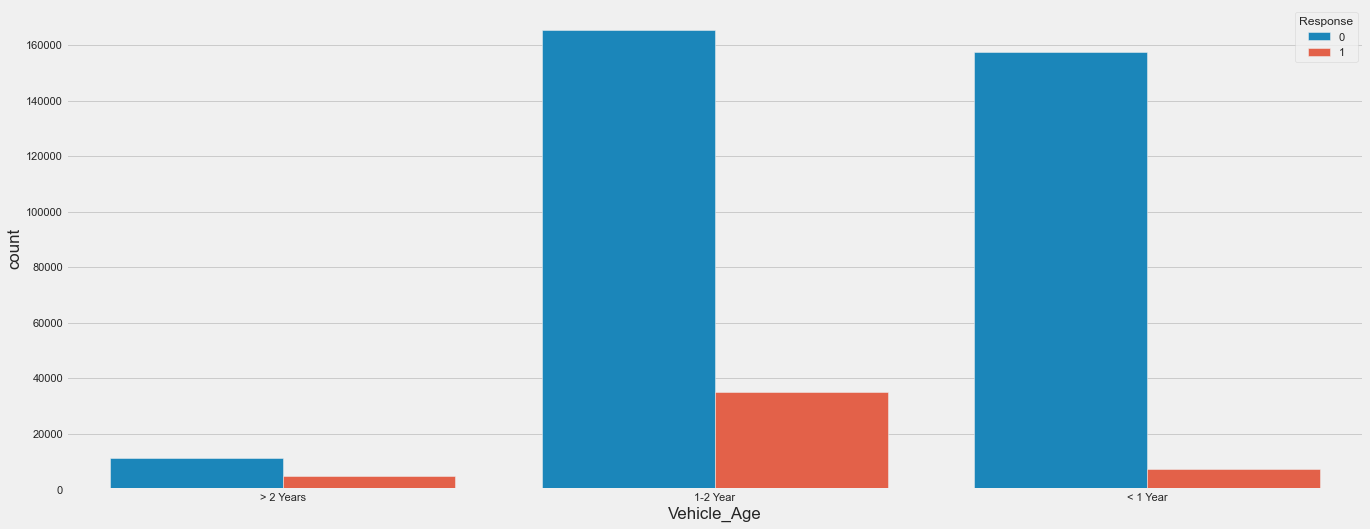

In [ ]:
sns.countplot(data=df_train,x='Vehicle_Age',hue='Response')

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='count'>

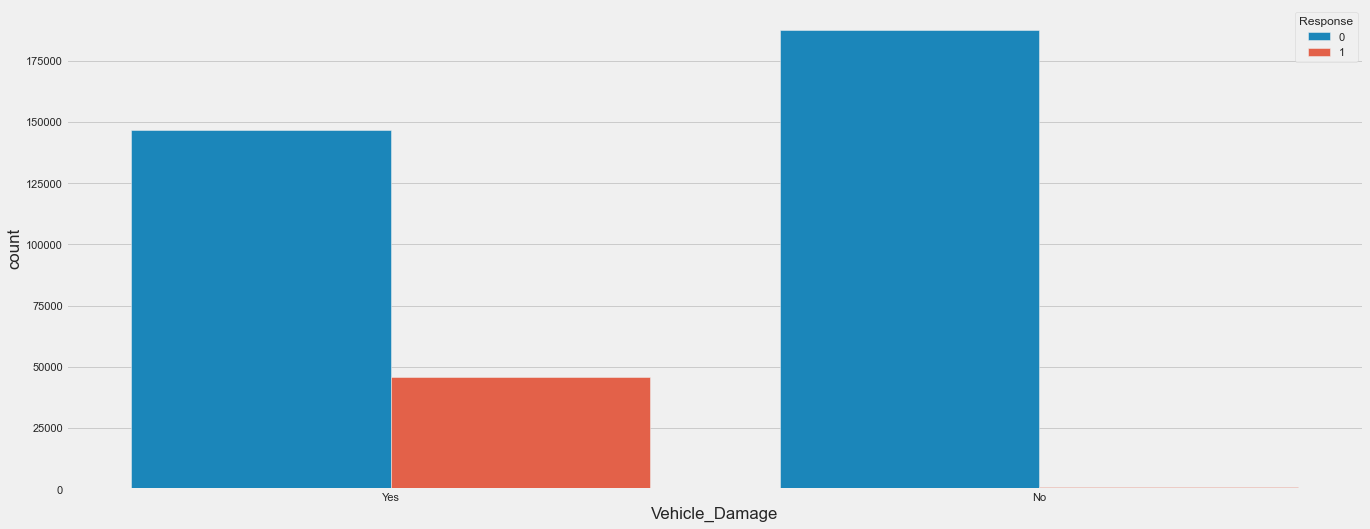

In [ ]:
sns.countplot(data=df_train,x='Vehicle_Damage',hue='Response')

<AxesSubplot:xlabel='Driving_License', ylabel='count'>

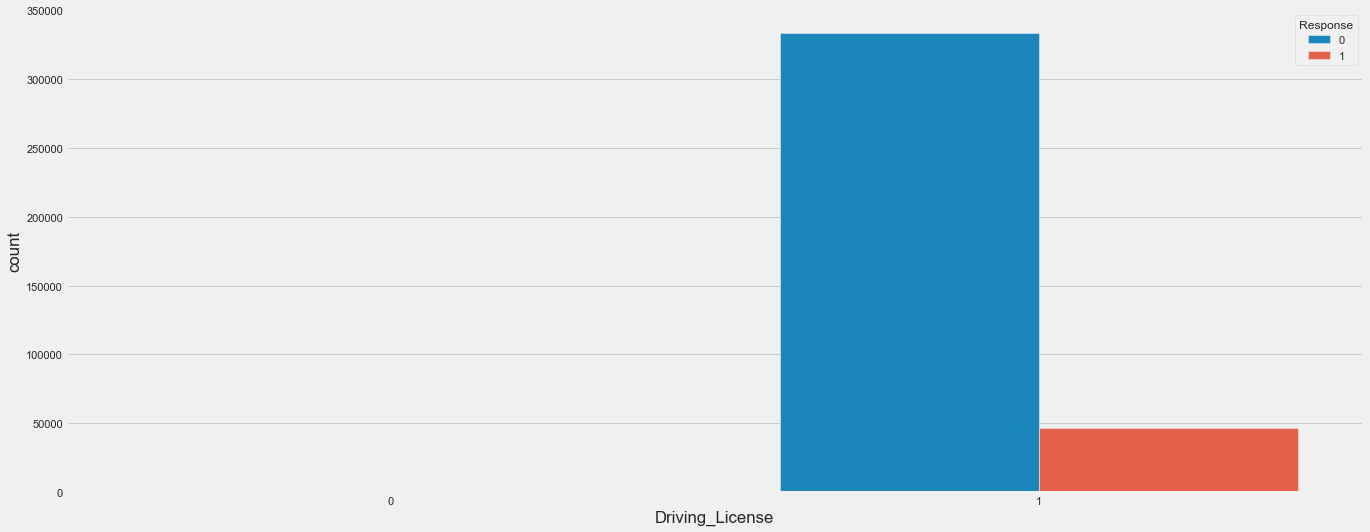

In [ ]:
sns.countplot(data=df_train,x='Driving_License',hue='Response')

<AxesSubplot:xlabel='Region_Code', ylabel='count'>

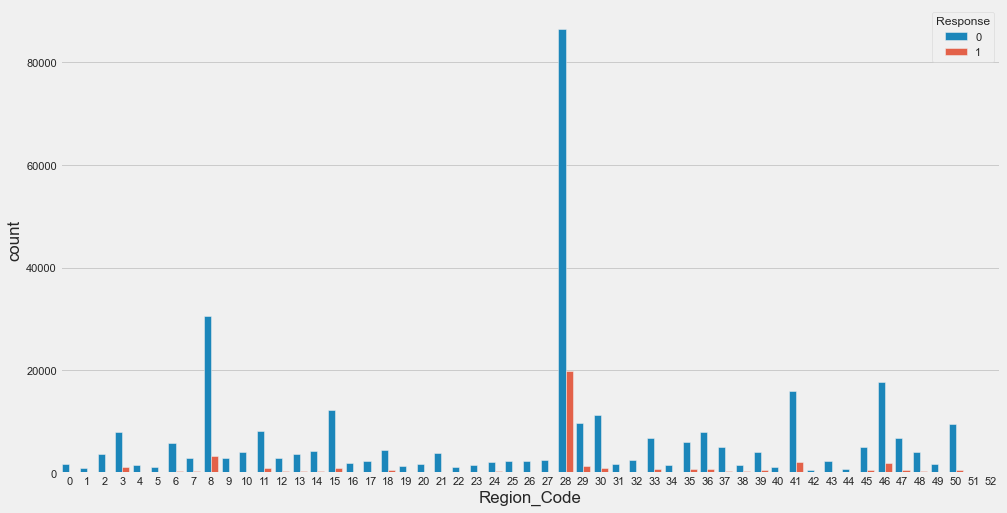

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_train,x='Region_Code',hue='Response')

<AxesSubplot:xlabel='Annual_Premium', ylabel='Count'>

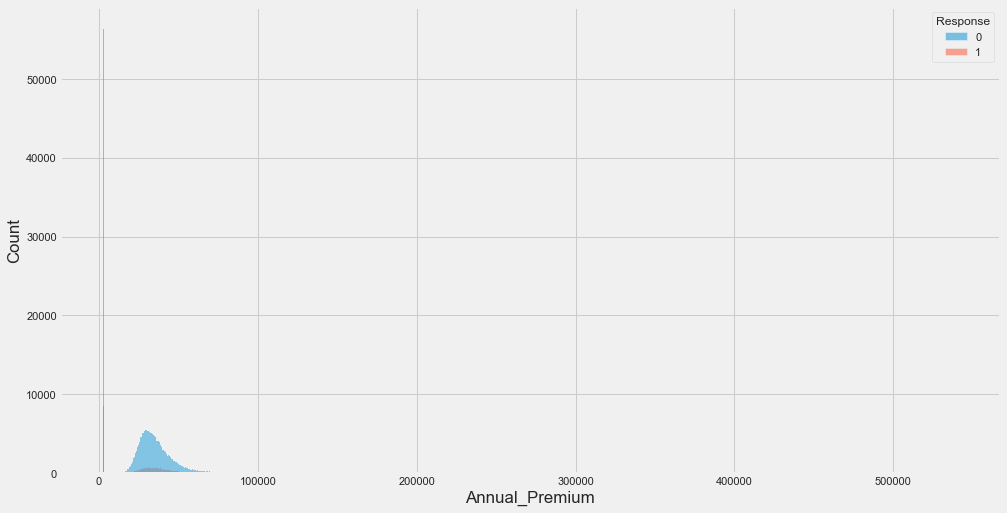

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(data=df_train,x='Annual_Premium',hue='Response')

<AxesSubplot:xlabel='Age', ylabel='Count'>

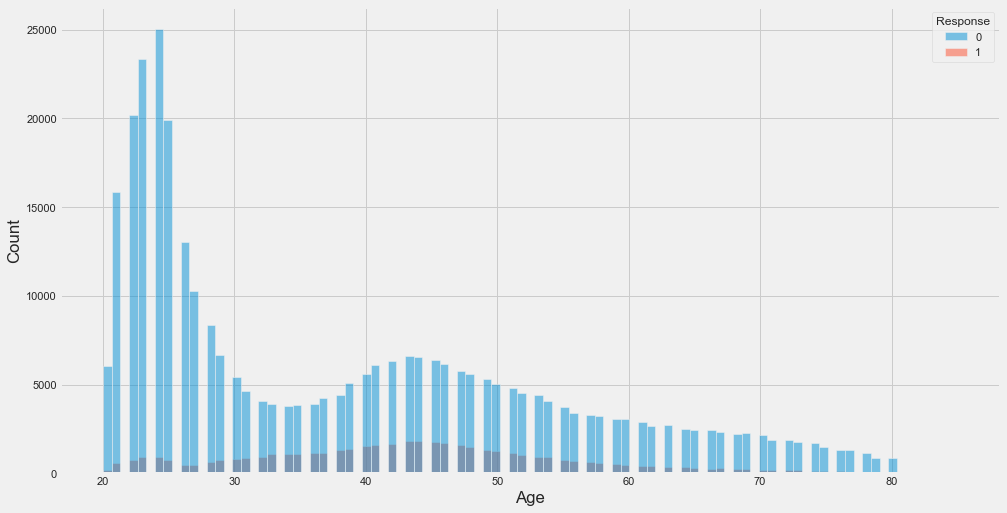

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(data=df_train,x='Age',hue='Response')

## Categorical vs Target

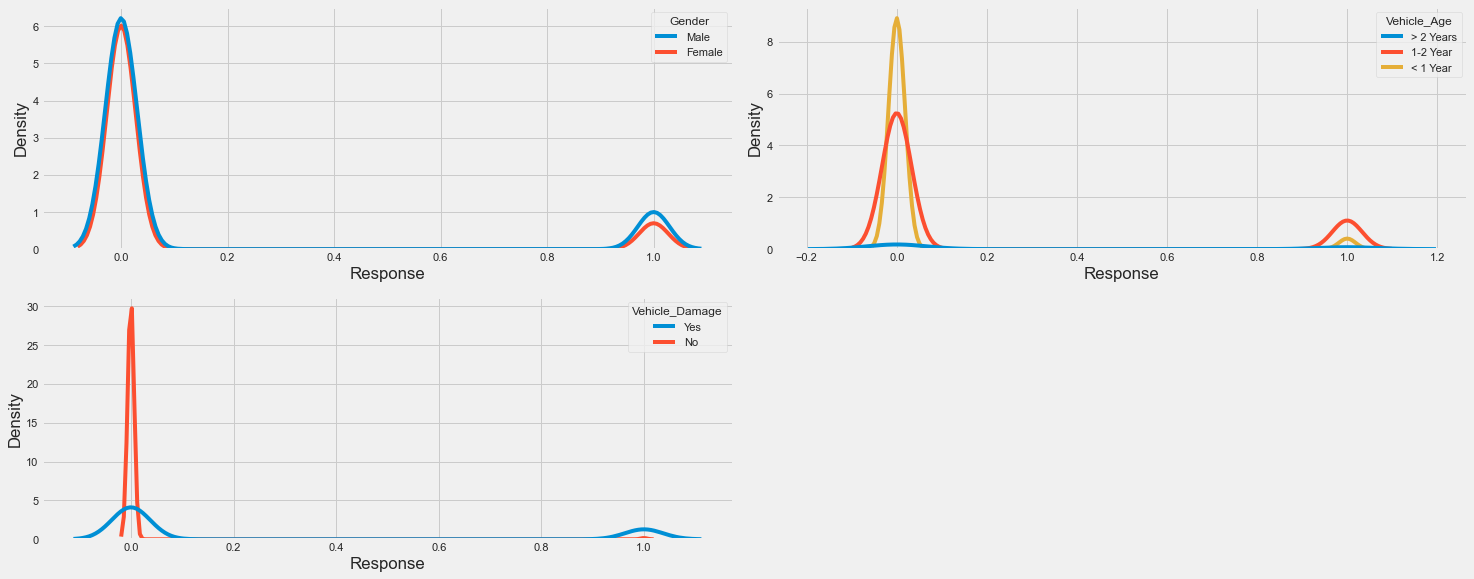

In [ ]:
# melihat hubungan fitur-fitur kategorikal dengan calon target pemodelan (Response)
features = cols_categorical
for i in range(0, len(features)):
    plt.subplot(2, 2, i+1) 
    sns.kdeplot(data=df_train, x='Response', hue=features[i])
    #plt.xlabel(features[i])
    plt.tight_layout()

**Insight**:
* Semua gender memiliki response yang sama banyaknya
* Umur kendaraan yang < 1 tahun cenderung tidak tertarik memiliki asuransi kendaraan
* Kendaraan yang pernah tidak pernah mengalami kerusakan, cenderung tidak membeli asuransi kendaraan

## Multivariate Analysis Insight 

 A. Korelasi antar feature
 * Kolom `Policy_Sales_Channel` dengan `Age` memiliki korelasi kuat negatif
 * Kolom `Previously_Insured` dengan `Response` memiliki korelasi kuat negatif
 * Kolom `Age`, `Response`,  dan `Annual_Premium` memiliki korelasi kuat positif
 * Kolom `Previously_Insured` dengan `Age` memiliki korelasi kuat negatif* Kolom `Policy_Sales_Channel` dengan `Previously_Insured` memiliki korelasi kuat positif

 Feature yang paling relevan dan harus dipertahankan adalah 
 1. `Age`
 2. `Previously_Insured`
 3. `Policy_Sales_Channel`
 4. `Annual_Premium`
 5. `Driving_License`

B. Pola menarik

  *  Tidak ada korelasi yang kuat antara target `Response` dengan masing-masing feature yang ada
  * Terdapat pola yang menarik dari beberapa feature sehingga perlu dilakukan pembuktian lebih lanjut seperti feature `Age` dan `Driving_License` karena memiliki korelasi yang lemah
  * Kemungkinan besar tidak ada data yang redundant (>0.7)
 

## Business Insight

 * Semua gender memiliki response yang sama banyaknya
  * Umur kendaraan yang < 1 tahun cenderung tidak tertarik memiliki asuransi kendaraan
  * Kendaraan yang pernah tidak pernah mengalami kerusakan, cenderung tidak membeli asuransi kendaraan
  * Jumlah response tertinggi berada di Region Code = 28, sehingga next bisa digunakan sebagai target marketing berdasarkan region


# Stage-2 Data Pre-Processing

## Handling Duplicated Data

In [15]:
# mengecek duplicated data (include ID)
df_train.duplicated().sum()

0

# Data Cleansing

In [16]:
# menyalin dataset mentah
df_clean = df_train_raw.copy()

* `df_train_raw` = dataset mentah
* `df_clean` = dataset yang sudah dilakukan cleansing (drop columns, drop rows, encoding, dll)

Gunakan `df_clean` jika ingin melakukan proses cleansing agar data mentah tetap terjaga nilainya.

## Handling Single & Unique Data

Single data yang dimaksud adalah kolom yang memiliki 1 unique value saja.

Unique data yang dimaksud adalah kolom yang seluruh barisnya berisi unique value (seperti id).

In [17]:
df_clean.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

Tidak ada kolom yang memiliki 1 unique value.


In [18]:
bef = len(df_clean.columns) # jumlah kolom sebelum dihapus
df_clean = df_clean.drop(['id'], axis = 1) # hapus kolom
aft = len(df_clean.columns) # jumlah kolom setelah dihapus
print(f"Jumlah kolom berkurang dari {bef} menjadi {aft}.")

Jumlah kolom berkurang dari 12 menjadi 11.


`id` adalah kolom yang seluruh barisnya berisi unique value, namun tidak memiliki pengaruh yang signifikan sehingga dihapus saja dari dataset

`Vintage` dihapus karena tidak memiliki korelasi/pengaruh terhadap seluruh variable yang ada (nilai korelasi = 0) 

## Handling Missing Data

In [19]:
df_clean.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

tidak ada data yang kosong pada setiap kolom yang ada di dataframe

## Handling Outliers
** Uji coba menggunakan 2 metode : Z-score dan IQR **

In [20]:
import re
from scipy import stats

In [21]:
# kolom yang akan dihapus outliersnya
cols_clean = ['Age','Annual_Premium','Policy_Sales_Channel']

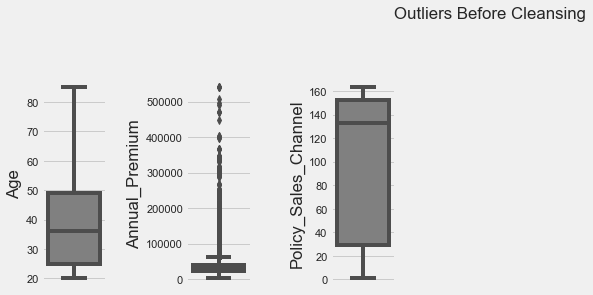

In [22]:
# Sebelum dihapus outliers
plt.figure(figsize = (14, 4))
for i in range(0, len(cols_clean)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y = df_clean[cols_clean[i]], color = 'grey', orient = 'v')

plt.suptitle('Outliers Before Cleansing', y = 1.05)
# plt.savefig(f"{gd_path}/gambar/outliers-before-cleansing-boxp.png", bbox_inches = 'tight', dpi = 150, transparent = True)
# plt.savefig(f"{gd_path}/gambar/outliers-before-cleansing-boxp.jpg", bbox_inches = 'tight', dpi = 150)
plt.tight_layout(pad = 1.5)
plt.show()

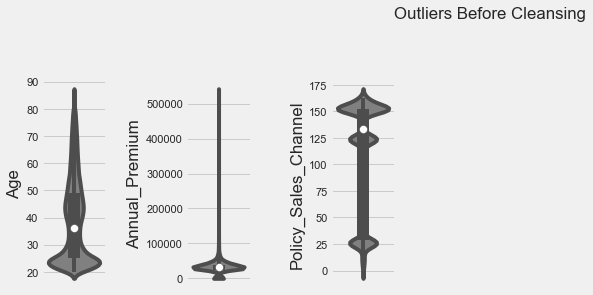

In [ ]:
#Sebelum dihapus outliers
plt.figure(figsize = (14, 4))
for i in range(0, len(cols_clean)):
    plt.subplot(1, 7, i+1)
    sns.violinplot(y = df_clean[cols_clean[i]], color = 'grey', orient = 'v')

plt.suptitle('Outliers Before Cleansing', y = 1.05)
# plt.savefig(f"{gd_path}/gambar/outliers-before-cleansing-viop.png", bbox_inches = 'tight', dpi = 150, transparent = True)
# plt.savefig(f"{gd_path}/gambar/outliers-before-cleansing-viop.jpg", bbox_inches = 'tight', dpi = 150)
plt.tight_layout(pad = 1.5)
plt.show()

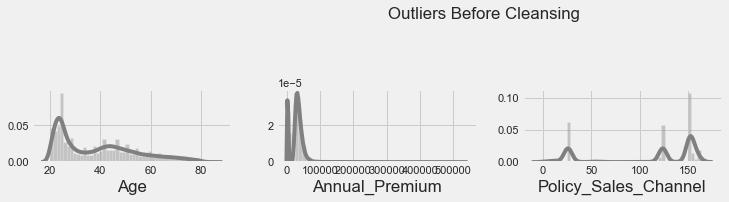

In [24]:
# Sebelum dihapus outliers
plt.figure(figsize = (14, 4))
for i in range(0, len(cols_clean)):
    plt.subplot(2, 4, i+1)
    sns.distplot(df_clean[cols_clean[i]], color = 'grey')
    plt.ylabel('')

plt.suptitle('Outliers Before Cleansing', y = 1.05)
# plt.savefig(f"{gd_path}/gambar/outliers-before-cleansing-hist.png", bbox_inches = 'tight', dpi = 150, transparent = True)
# plt.savefig(f"{gd_path}/gambar/outliers-before-cleansing-hist.jpg", bbox_inches = 'tight', dpi = 150)
plt.tight_layout(pad = 1.5)
plt.show()

### Z-Score Method

In [25]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_clean)}')

filtered_entries = np.array([True] * len(df_clean))

for col in cols_clean:
    zscore = abs(stats.zscore(df_clean[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_ZSCORE = df_clean[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3, karena data abs >3 adalah data outliers 

print(f'Jumlah baris setelah memfilter outlier: {len(df_ZSCORE)}')

Jumlah baris sebelum memfilter outlier: 381109
Jumlah baris setelah memfilter outlier: 379026


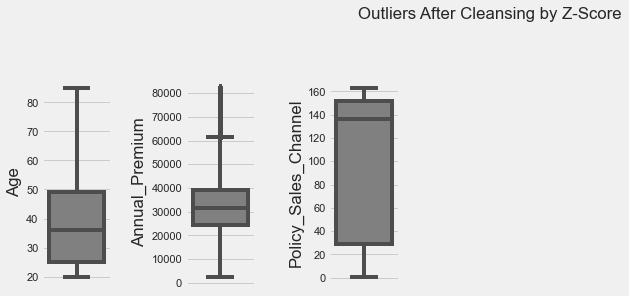

In [ ]:
# Sesudah menggunakan ZSCORE
plt.figure(figsize = (14, 4))
for i in range(0, len(cols_clean)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y = df_ZSCORE[cols_clean[i]], color = 'grey', orient = 'v')

plt.suptitle('Outliers After Cleansing by Z-Score', y = 1.05)
# plt.savefig(f"{gd_path}/gambar/outliers-after-cleansing-zscore-boxp.png", bbox_inches = 'tight', dpi = 150, transparent = True)
# plt.savefig(f"{gd_path}/gambar/outliers-after-cleansing-zscore-boxp.jpg", bbox_inches = 'tight', dpi = 150)
plt.tight_layout(pad = 1.5)
plt.show()

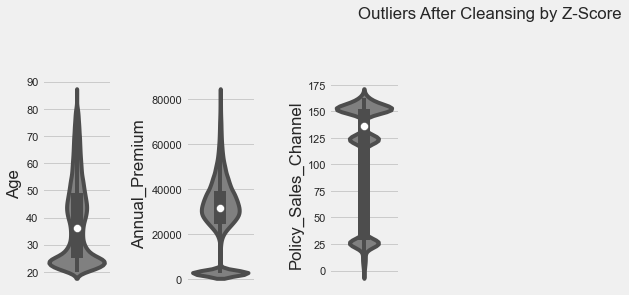

In [26]:
# Sesudah menggunakan ZSCORE
plt.figure(figsize = (14, 4))
for i in range(0, len(cols_clean)):
    plt.subplot(1, 7, i+1)
    sns.violinplot(y = df_ZSCORE[cols_clean[i]], color = 'grey', orient = 'v')

plt.suptitle('Outliers After Cleansing by Z-Score', y = 1.05)
# plt.savefig(f"{gd_path}/gambar/outliers-after-cleansing-zscore-viop.png", bbox_inches = 'tight', dpi = 150, transparent = True)
# plt.savefig(f"{gd_path}/gambar/outliers-after-cleansing-zscore-viop.jpg", bbox_inches = 'tight', dpi = 150)
plt.tight_layout(pad = 1.5)
plt.show()

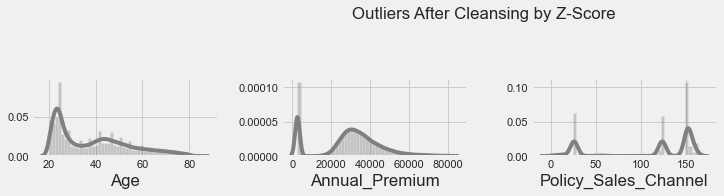

In [27]:
# Sesudah menggunakan ZSCORE
plt.figure(figsize = (14, 4))
for i in range(0, len(cols_clean)):
    plt.subplot(2, 4, i+1)
    sns.distplot(df_ZSCORE[cols_clean[i]], color = 'grey')
    plt.ylabel('')

plt.suptitle('Outliers After Cleansing by Z-Score', y = 1.05)
# plt.savefig(f"{gd_path}/gambar/outliers-after-cleansing-zscore-hist.png", bbox_inches = 'tight', dpi = 150, transparent = True)
# plt.savefig(f"{gd_path}/gambar/outliers-after-cleansing-zscore-hist.jpg", bbox_inches = 'tight', dpi = 150)
plt.tight_layout(pad = 1.5)
plt.show()

### IQR Method

In [28]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_clean)}')

filtered_entries = np.array([True] * len(df_clean))
for col in cols_clean:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_clean[col] >= low_limit) & (df_clean[col] <= high_limit)) & filtered_entries
    
df_IQR = df_clean[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_IQR)}')

Jumlah baris sebelum memfilter outlier: 381109
Jumlah baris setelah memfilter outlier: 370789


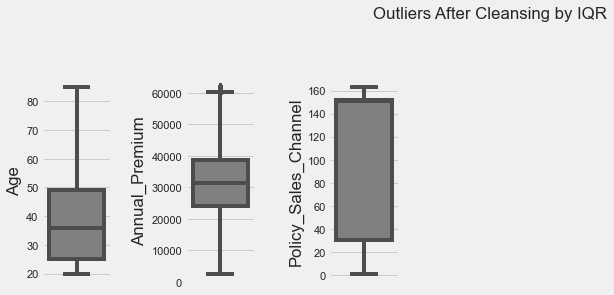

In [ ]:
# Sesudah menggunakan IQR
plt.figure(figsize = (14, 4))
for i in range(0, len(cols_clean)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y = df_IQR[cols_clean[i]], color = 'grey', orient = 'v')

plt.suptitle('Outliers After Cleansing by IQR', y = 1.05)
# plt.savefig(f"{gd_path}/gambar/outliers-after-cleansing-iqr-boxp.png", bbox_inches = 'tight', dpi = 150, transparent = True)
# plt.savefig(f"{gd_path}/gambar/outliers-after-cleansing-iqr-boxp.jpg", bbox_inches = 'tight', dpi = 150)
plt.tight_layout(pad = 1.5)
plt.show()

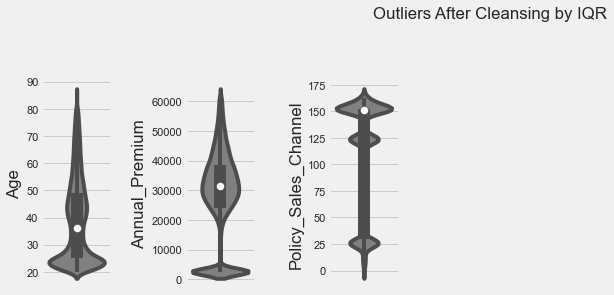

In [29]:
# Sesudah menggunakan IQR
plt.figure(figsize = (14, 4))
for i in range(0, len(cols_clean)):
    plt.subplot(1, 7, i+1)
    sns.violinplot(y = df_IQR[cols_clean[i]], color = 'grey', orient = 'v')

plt.suptitle('Outliers After Cleansing by IQR', y = 1.05)
# plt.savefig(f"{gd_path}/gambar/outliers-after-cleansing-iqr-viop.png", bbox_inches = 'tight', dpi = 150, transparent = True)
# plt.savefig(f"{gd_path}/gambar/outliers-after-cleansing-iqr-viop.jpg", bbox_inches = 'tight', dpi = 150)
plt.tight_layout(pad = 1.5)
plt.show()

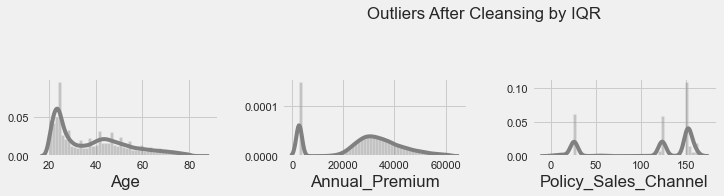

In [30]:
# Sesudah menggunakan IQR
plt.figure(figsize = (14, 4))
for i in range(0, len(cols_clean)):
    plt.subplot(2, 4, i+1)
    sns.distplot(df_IQR[cols_clean[i]], color = 'grey')
    plt.ylabel('')

plt.suptitle('Outliers After Cleansing by IQR', y = 1.05)
# plt.savefig(f"{gd_path}/gambar/outliers-after-cleansing-iqr-viop.png", bbox_inches = 'tight', dpi = 150, transparent = True)
# plt.savefig(f"{gd_path}/gambar/outliers-after-cleansing-iqr-viop.jpg", bbox_inches = 'tight', dpi = 150)
plt.tight_layout(pad = 1.5)
plt.show()

### Result Handling Outliers

Zscore lebih cocok digunakan karena data yang dihilangkan tidak sebanyak menggunakan IQR

In [31]:
df_clean = df_ZSCORE.copy()
df_clean.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# Feature Transformation





## Log Transformation

Log Transformation digunakan pada data yang right-skewed. Berdasarkan pada hasil sebelumnya, Age dan Annual_Premium menunjukkan right-skewed. 

<AxesSubplot:xlabel='Age', ylabel='Density'>

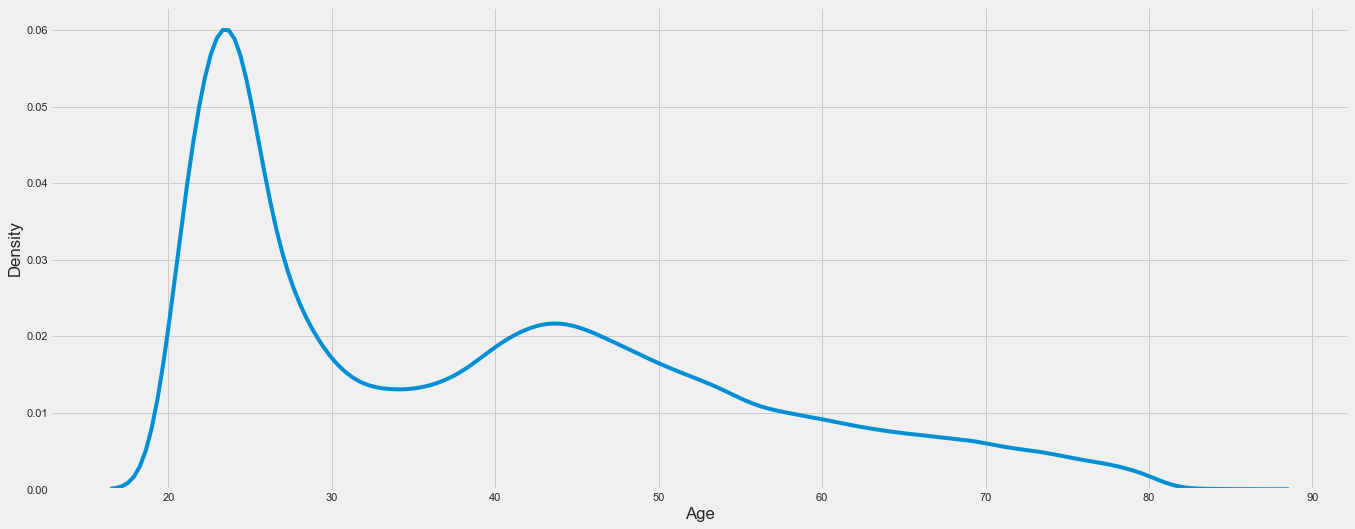

In [32]:
# distribusi Age (nilai asli)

sns.kdeplot(df_clean['Age'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

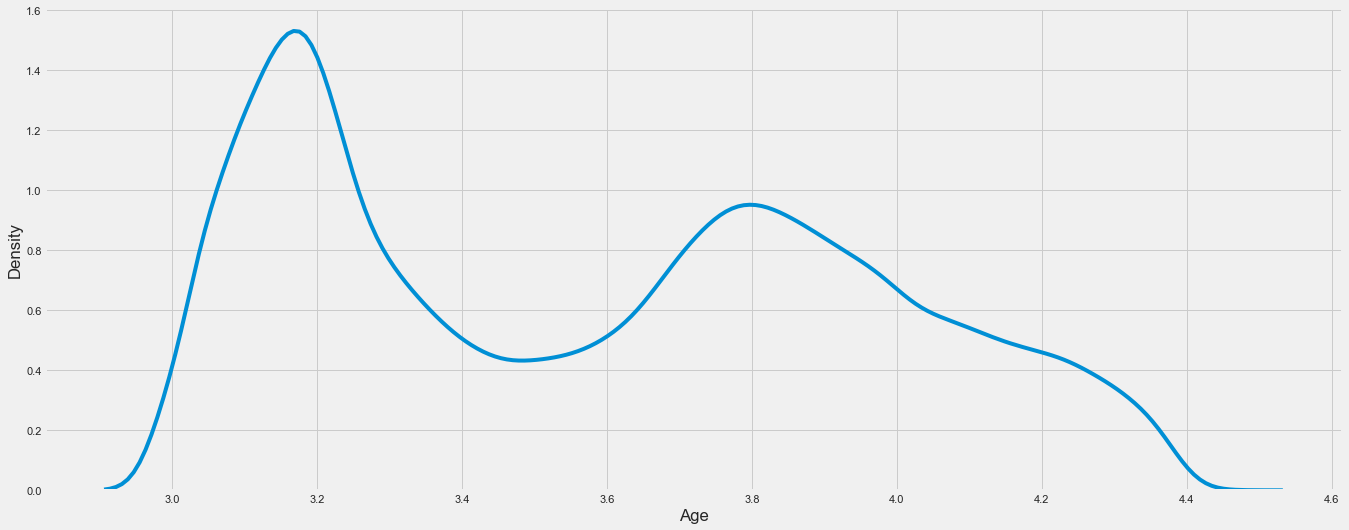

In [33]:
# distribusi Age (setelah log transformation)

sns.kdeplot(np.log(df_clean['Age']))

In [34]:
# transformation
df_clean['log_Age'] = np.log(df_clean['Age'])

<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

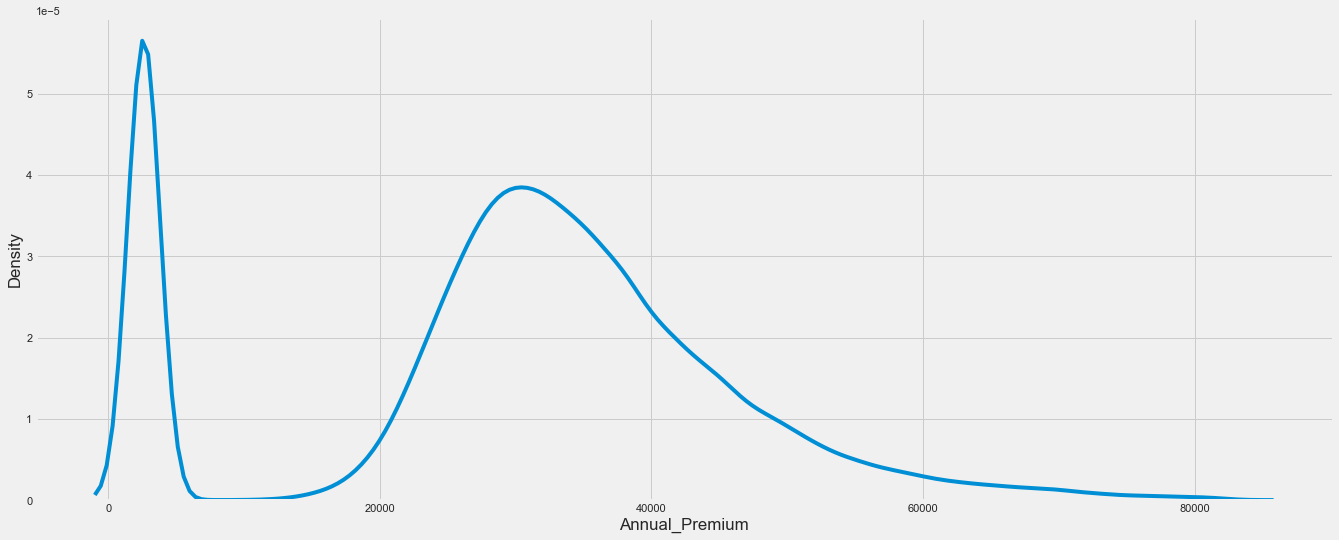

In [35]:
# distribusi Annual Premium (nilai asli)

sns.kdeplot(df_clean['Annual_Premium'])

<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

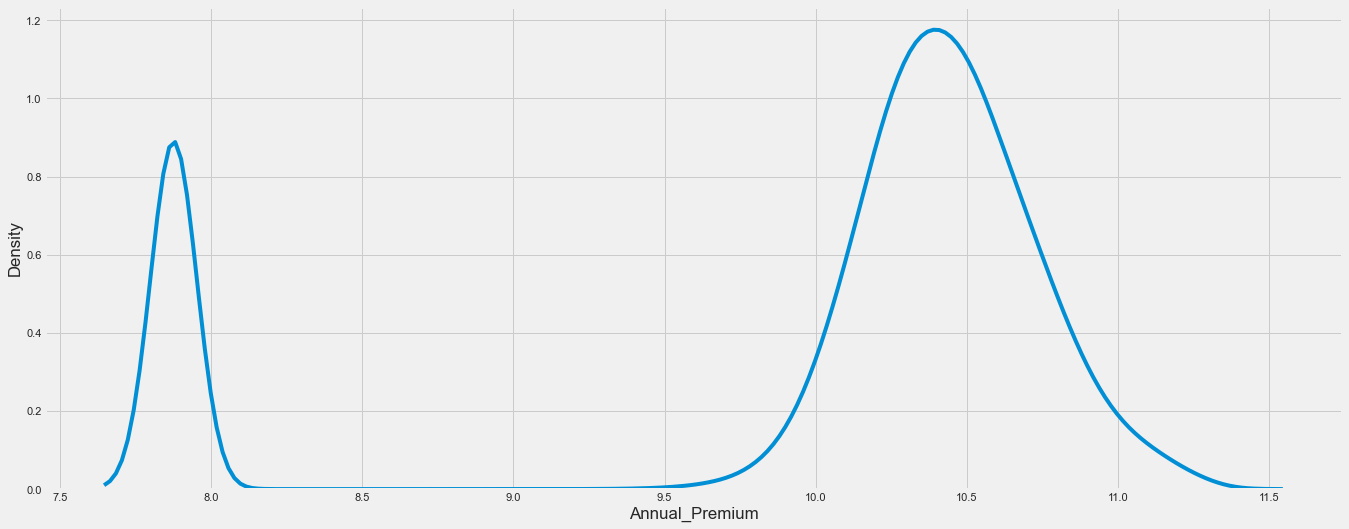

In [ ]:
# distribusi Annual Premium (setelah log transformation)

sns.kdeplot(np.log(df_clean['Annual_Premium']))

In [36]:
# transformation
df_clean['log_Annual_Premium'] = np.log(df_clean['Annual_Premium'])

*Setelah dilakukan transformasi, `Age` dan `Annual_Premium` memiliki distribusi yang normal/tidak skewed*

## Normalization/Standardization

*Standardize : numerik yang distribusi normal*


*Normalize : numerik yang skewed*

In [37]:
import imblearn as im
from imblearn import under_sampling, over_sampling
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [38]:
# standardization scaling untuk Age karena skewed ke kanan
std_cols = ['Age']
for col in std_cols:
    x = df_clean[col].values.reshape(len(df_clean), 1)
    scaler = StandardScaler()
    scaler.fit(x)
    x_scaled = scaler.transform(x)
    df_clean[col] = x_scaled

# normalization scaling
nrm_cols = ['Annual_Premium', 'Policy_Sales_Channel']
for col in nrm_cols:
    x = df_clean[col].values.reshape(len(df_clean), 1)
    scaler = MinMaxScaler()
    scaler.fit(x)
    x_scaled = scaler.transform(x)
    df_clean[col] = x_scaled

df_clean[std_cols + nrm_cols].head()

,Age,Annual_Premium,Policy_Sales_Channel
0,0.335598,0.475343,0.154321
1,2.400284,0.388403,0.154321
2,0.529162,0.448198,0.154321
3,-1.148396,0.326610,0.932099
4,-0.632224,0.312497,0.932099


# Feature Engineering


## Create New Features

In [39]:
# tambah fitur group age
"""
group age
0 : 20-30
1 : 31-40
2 : 41-50
3 : 51-60
4 : 61-70
5 : 71-80
6 : 81-90
"""

df_clean['GroupAge'] = np.where(df_clean['Age'] <= 30, 0,
                                np.where((df_clean['Age'] > 30) & (df_clean['Age'] <= 40), 1,
                                         np.where((df_clean['Age'] > 40) & (df_clean['Age'] <= 50), 2,
                                                  np.where((df_clean['Age'] > 50) & (df_clean['Age'] <= 60), 3,
                                                           np.where((df_clean['Age'] > 60) & (df_clean['Age'] <= 70), 4,
                                                                    np.where((df_clean['Age'] > 70) & (df_clean['Age'] <= 80), 5, 6))))))
df_clean[['Age', 'GroupAge']]

,Age,GroupAge
0,0.335598,0
1,2.400284,0
2,0.529162,0
3,-1.148396,0
4,-0.632224,0
...,...,...
381104,2.271241,0
381105,-0.567703,0
381106,-1.148396,0
381107,1.884112,0


## Feature Encoding (Label Encoding)

In [40]:
# traditional labeling
# mengubah data kategorikal menjadi numerik

label_cols = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

#Gender : Female = 0; Male = 1
df_clean['Gender'] = df_clean['Gender'].apply(lambda x : 0 if x == 'Female' else 1)

#Vehicle_Age : '< 1 Year' = 0; '1-2 Year' = 1; '> 2 Years' = 2
df_clean['Vehicle_Age'] = df_clean['Vehicle_Age'].apply(lambda x: 0 if x=='< 1 Year' else (1 if x=='1-2 Year' else 2))

#Vehicle_Damage : No = 0; Yes = 1
df_clean['Vehicle_Damage'] = df_clean['Vehicle_Damage'].apply(lambda x: 0 if x=='No' else 1)


In [ ]:
df_clean.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,log_Age,log_Annual_Premium,GroupAge
0,1,0.335598,1,28,0,2,1,0.475343,0.154321,217,1,3.784190,10.607921,0
1,1,2.400284,1,3,0,1,0,0.388403,0.154321,183,0,4.330733,10.420375,0
2,1,0.529162,1,28,0,2,1,0.448198,0.154321,27,1,3.850148,10.553049,0
3,1,-1.148396,1,11,1,0,0,0.326610,0.932099,203,0,3.044522,10.261826,0
4,0,-0.632224,1,41,1,0,0,0.312497,0.932099,39,0,3.367296,10.221796,0


# Imbalance Class



In [41]:
%%capture
%%bash
pip install imbalance-learn

In [42]:
y = df_clean['Response'].values
X = df_clean[[col for col in df_clean.columns if col not in ['id', 'Response']]].values

In [45]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

X_under, y_under = under_sampling.RandomUnderSampler(0.4).fit_resample(X,y)
X_over, y_over = over_sampling.RandomOverSampler(0.4).fit_resample(X,y)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE().fit_resample(X,y)

print(pd.Series(y).value_counts())
print(pd.Series(y_over).value_counts())
print(pd.Series(y_under).value_counts())

0    332638
1     46388
dtype: int64
0    332638
1    133055
dtype: int64
0    115970
1     46388
dtype: int64


Perbandingan response pengguna pada data awal adalah 1:7 (respon 1 : respon 0)<br>
Dengan under sampling dan over sampling ratio menjadi 1:2<br>
Untuk over sampling jumlah respon 0 sama seperti data awal dan ada penambahan pada jumlah respon 1<br>
Sedangkan under sampling jumlah respon 1 tetap sama seperti data awal dan ada penambahan jumlah respon 0.

## Classification

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

In [80]:
# Split Feature and Label
X = df_clean.drop(columns=['Region_Code', 'Response'])
y = df_clean['Response'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [81]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [82]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [83]:
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.88
Precision (Test Set): 0.35
Recall (Test Set): 0.00
F1-Score (Test Set): 0.01
AUC: 0.50


In [84]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.8772755712013508
Test score:0.8775723783726739


In [85]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
hyperparameters = dict(penalty=penalty, C=C)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
model = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='precision')

# Fitting Model & Evaluation
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.88
Precision (Test Set): 0.00
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
AUC: 0.50


In [86]:
print('Best algorithm:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

Best algorithm: l2
Best C: 0.001


In [87]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 1.0
Test score:0.0


## K-nearest Neighbor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsClassifier

# List of hyperparameter
n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Init model
knn = KNeighborsClassifier()
model = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=42, scoring='precision')

# Fit Model & Evaluasi
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

In [ ]:
print('Best n_neighbors:', model.best_estimator_.get_params()['n_neighbors'])
print('Best p:', model.best_estimator_.get_params()['p'])
print('Best algorithm:', model.best_estimator_.get_params()['algorithm'])

In [ ]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

In [ ]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 50, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='precision')
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

In [ ]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])

In [ ]:
print('Train score: ' + str(model.score(X_train, y_train)))
print('Test score:' + str(model.score(X_test, y_test)))

## Feature Importance

In [ ]:
feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

## Ensemble Method

In [ ]:
pd.set_option("max_column",100)
pd.set_option("max_colwidth",1000)
pd.set_option("max_row",1000)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

# Split Train Test Data

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Standard Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

## Bagging : Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
eval_classification(rf, y_pred, X_train, y_train, X_test, y_test)

In [ ]:
show_feature_importance(rf)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='recall')
rf_tuned.fit(X_train,y_train)

# Predict & Evaluation
y_pred = rf_tuned.predict(X_test)#Check performa dari model
eval_classification(rf_tuned, y_pred, X_train, y_train, X_test, y_test)

In [ ]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

In [ ]:
show_feature_importance(rf_tuned.best_estimator_)

## Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train,y_train)

y_pred = ab.predict(X_test)
eval_classification(ab, y_pred, X_train, y_train, X_test, y_test)

In [ ]:
show_feature_importance(ab)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='recall')
ab_tuned.fit(X_train,y_train)

# Predict & Evaluation
y_pred = ab_tuned.predict(X_test)#Check performa dari model
eval_classification(ab_tuned, y_pred, X_train, y_train, X_test, y_test)

In [ ]:
show_best_hyperparameter(ab_tuned.best_estimator_, hyperparameters)

In [ ]:
show_feature_importance(ab_tuned.best_estimator_)

## XGBoost

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)

y_pred = xg.predict(X_test)
eval_classification(xg, y_pred, X_train, y_train, X_test, y_test)

In [ ]:
show_feature_importance(xg)

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
y_pred = xg_tuned.predict(X_test)#Check performa dari model
eval_classification(xg_tuned, y_pred, X_train, y_train, X_test, y_test)

In [ ]:
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

In [ ]:
show_feature_importance(xg_tuned.best_estimator_)

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train, eval_metric=['logloss','auc'], eval_set=[(X_train, y_train),(X_test, y_test)], verbose=0, early_stopping_rounds=14) # coba di 38 yang errornya besar

y_pred = xg.predict(X_test)
eval_classification(xg, y_pred, X_train, y_train, X_test, y_test)